In [11]:
import pandas as pd
import numpy as np
file_path=r"C:\Users\LENOVO\Downloads\housing.csv"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv(file_path,names=column_names,delimiter=r"\s+",skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

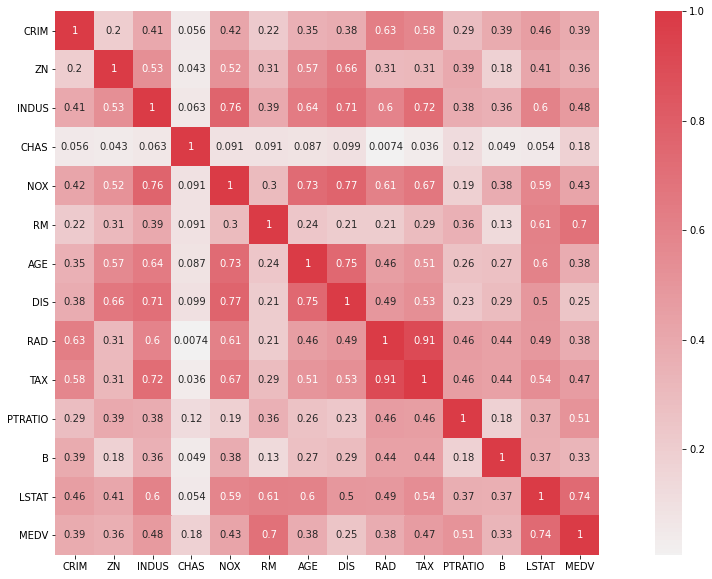

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
cmap= sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(df.corr().abs(),cmap=cmap,center=0, square=True, annot=True)

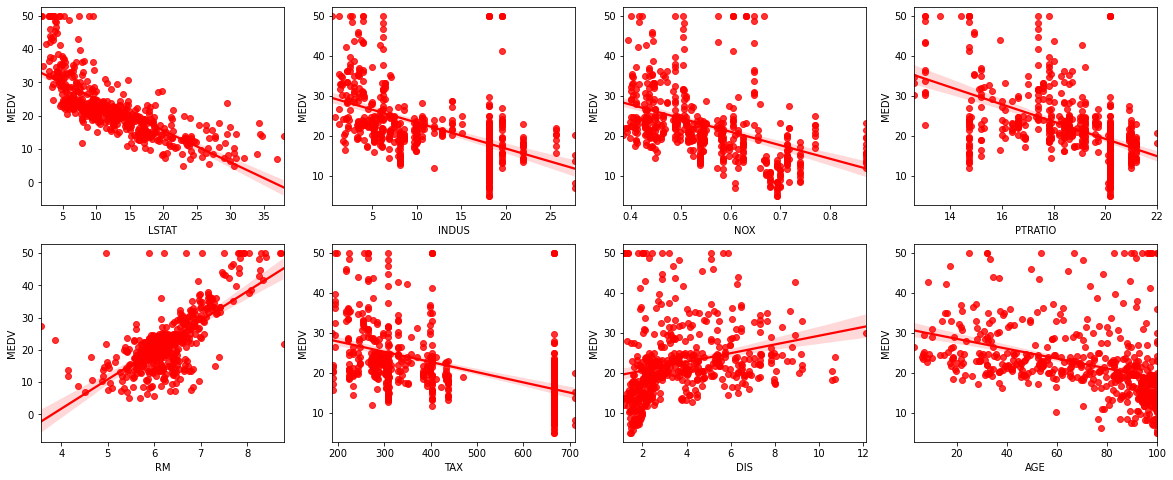

In [13]:
fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=df[col],y=df['MEDV'],color='red',ax=ax)

IndexError: index 8 is out of bounds for axis 0 with size 8

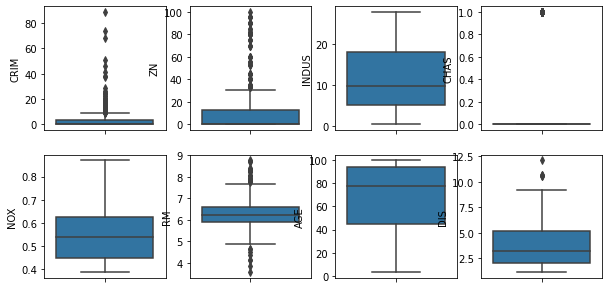

In [20]:
fig, axs=plt.subplots( ncols=4, nrows=2, figsize=(10, 5) )
index=0
axs=axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k,data=df,ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

In [21]:
df=df[~((df['RM']>=8.5)|(df['RM']<4))]

In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
target=df['MEDV']
features= df.drop('MEDV',axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(features,target, test_size=0.3)
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test)
regressor=SVR(kernel='rbf')
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.5950865058014764

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
K=15
parameters=[{'kernel':['rbf'],'gamma': [1e-4,1e-3,0.01,0.1,0.2,0.5,0.6,0.9],'C':[1,10,100,1000,10000]}]
print("Tuning hyper-parameters")
scorer=make_scorer(mean_squared_error, greater_is_better=False)
svr=GridSearchCV(SVR(epsilon=0.01),parameters,cv=K,scoring=scorer)
svr.fit(X_train,Y_train)
print("Grid scores on training set:")
means=svr.cv_results_['mean_test_score']
stds=svr.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r%(mean,std*2,params)")

Tuning hyper-parameters


KeyboardInterrupt: 

In [27]:
regressor_tuned=SVR(kernel='rbf',C=1000, gamma=0.9)
regressor_tuned.fit(X_train, Y_train)
regressor_tuned.score(X_test, Y_test)

0.8176980742295767